In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from time import sleep
%matplotlib notebook

In [2]:
online_path = '/archive/aes/projects/offline_online_comparison/online/'
woa09_path = '/archive/aes/projects/offline_online_comparison/offline_woa09/5day/'
vgrid_path = '/archive/aes/projects/offline_online_comparison/offline_vgrid/5day/'
static_path = '/archive/aes/projects/offline_online_comparison/ocean_annual.static.nc'

In [3]:
bp_woa09 = np.load(woa09_path+'bp.column_integral.0001.0500.npy')
bp_vgrid = np.load(vgrid_path+'bp.column_integral.0001.0025.npy')
bp_vgrid = np.concatenate((bp_vgrid,np.load(vgrid_path+'bp.column_integral.0026.0325.npy')))
bp_online = np.load(online_path+'bp.column_integral.0001.0055.npy')
bp_online = np.concatenate((bp_online,np.load(online_path+'bp.column_integral.0056.0073.npy')))

In [4]:
geolat = Dataset(static_path).variables['geolat'][:,:]
geolon = Dataset(static_path).variables['geolon'][:,:]
area = Dataset(static_path).variables['areacello'][:,:]
lat = Dataset(static_path).variables['yh'][:]
lon = Dataset(static_path).variables['xh'][:]

In [5]:
bp_woa09=np.ma.masked_where(bp_woa09<=0.,bp_woa09)
bp_vgrid=np.ma.masked_where(bp_bgrid<=0.,bp_vgrid)
bp_online=np.ma.masked_where(bp_online<=0.,bp_online)

NameError: name 'bp_bgrid' is not defined

<IPython.core.display.Javascript object>


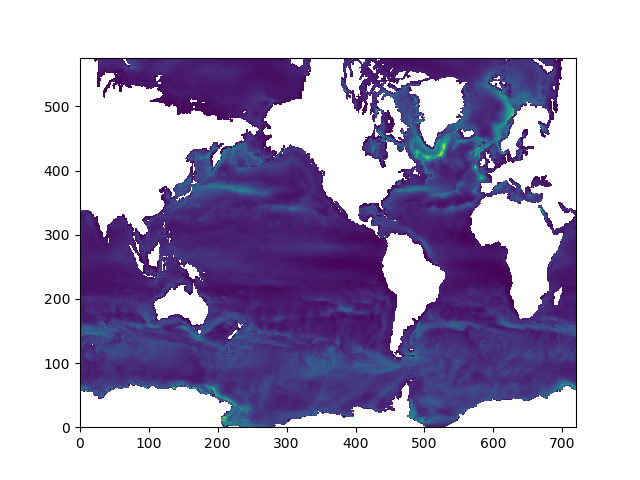

In [16]:
plt.pcolormesh(bp_woa09[0,:,:])

In [19]:
def plot_global_surface(data,vmin=0,vmax=1):
    m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='gray')
    m.drawparallels(np.arange(-90,120,30))
    m.drawmeridians(np.arange(0,380,60))
    x,y = m(geolon,geolat)
    m.pcolormesh(x,y,data,vmin=vmin,vmax=vmax); m.colorbar()
    m.contour(x,y,data,np.linspace(vmin,vmax,10),colors='black')

<IPython.core.display.Javascript object>


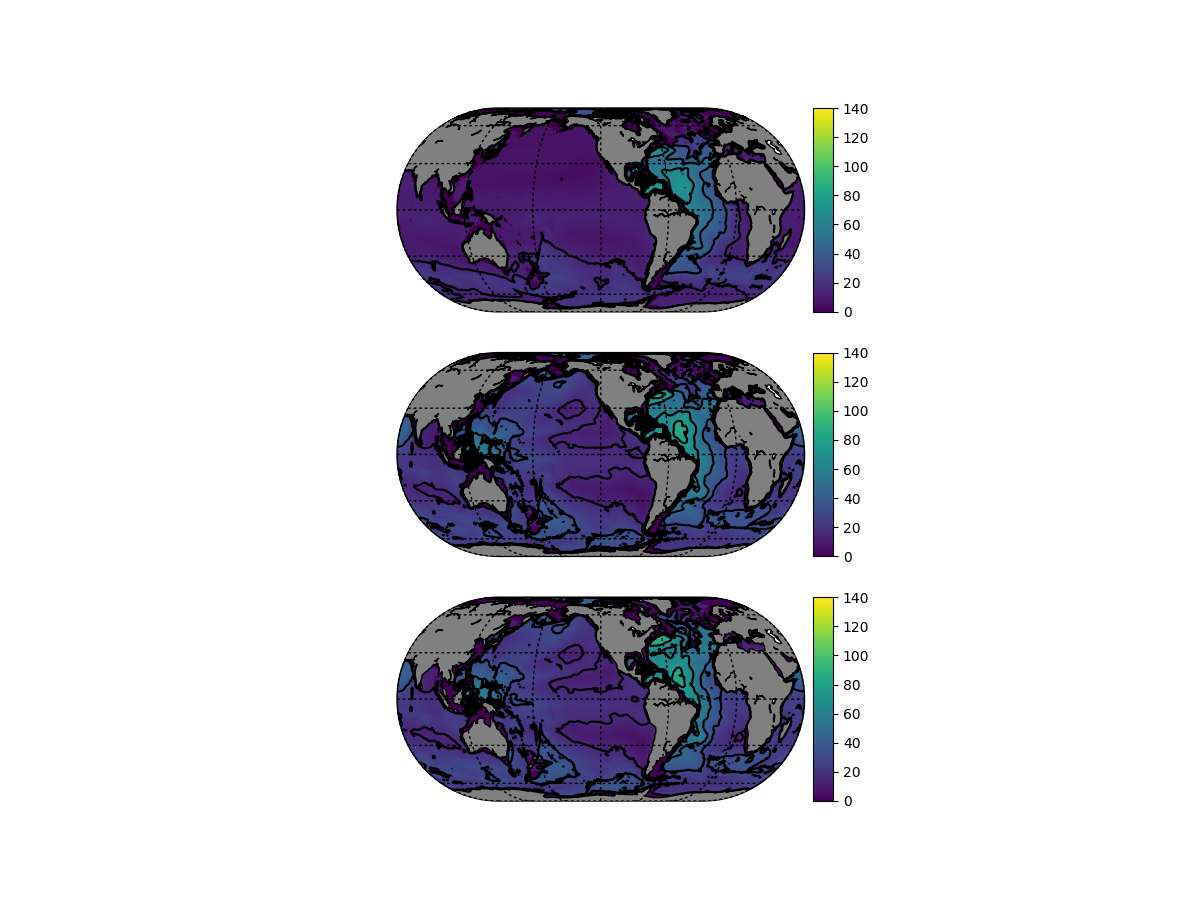

/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/ba

In [20]:
tidx = 70
plt.figure(figsize=(12,9))
plt.clf()
plt.subplot(3,1,1)
plot_global_surface(bp_online[tidx,:,:],0,140);
plt.subplot(3,1,2)
plot_global_surface(bp_vgrid[tidx,:,:],0,140);
plt.subplot(3,1,3)
plot_global_surface(bp_woa09[tidx,:,:],0,140);

In [9]:
# Plot and calculate CvM
ntime, nlat, nlon = bp_online.shape
trange = np.arange(0,ntime)
bp_online_norm = bp_online[trange,:,:]/np.trapz(bp_online[trange,:,:],axis=0)
bp_woa09_norm = bp_woa09[trange,:,:]/np.trapz(bp_woa09[trange,:,:],axis=0)
bp_vgrid_norm = bp_vgrid[trange,:,:]/np.trapz(bp_vgrid[trange,:,:],axis=0)
bp_woa09_norm=np.ma.masked_where(bp_woa09[trange,:,:]<=0.,bp_woa09_norm)
bp_vgrid_norm=np.ma.masked_where(bp_vgrid[trange,:,:]<=0.,bp_vgrid_norm)
bp_online_norm=np.ma.masked_where(bp_online[trange,:,:]<=0.,bp_online_norm)
CvM_online_woa09 = np.trapz(np.square(bp_online_norm-bp_woa09_norm),bp_online_norm, axis=0)

/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/local/home/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [ ]:
def plot_individual_ttd(plotlat,plotlon,xlim,ylim):
    latidx = np.argmin(np.abs(plotlat-lat)) ; lonidx = np.argmin(np.abs(plotlon-lon))    
    plt.plot(bp_online_norm[:,latidx,lonidx],label = 'Online',color = 'black', linewidth=4)
    plt.plot(bp_woa09_norm[:,latidx,lonidx], label = 'WOA09',linewidth = 3)
    plt.plot(bp_vgrid_norm[:,latidx,lonidx], label = '50 Level', linewidth = 3)
    plt.grid(ls='dashed')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('Boundary impulse at %0.1fN,%0.1fN' % (plotlat,plotlon))    

In [ ]:
fig=plt.figure()
ax = plt.subplot(3,1,1)
plotlat = 30 ; plotlon = -150; plot_individual_ttd(plotlat,plotlon,(0,30),(0,0.1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.legend()
ax = plt.subplot(3,1,2)
plotlat = 0 ; plotlon = -150; plot_individual_ttd(plotlat,plotlon,(0,30),(0,0.1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(3,1,3)
fig.subplots_adjust(hspace=0.5)
plotlat = -30 ; plotlon = -150; plot_individual_ttd(plotlat,plotlon,(0,30),(0,0.1))


In [7]:
def plot_meridional_ttd(ax,data,vmin,vmax):
    mesh_ax = ax.pcolormesh(trange,lat,np.log10(data.transpose()),vmin=vmin,vmax=vmax);    
    ax.contour(trange,lat,-np.log10(data.transpose()),np.linspace(-vmax,-vmin,15),colors='black',ls='solid');
    ax.set_xlabel('Time (years)')
    return mesh_ax

<IPython.core.display.Javascript object>


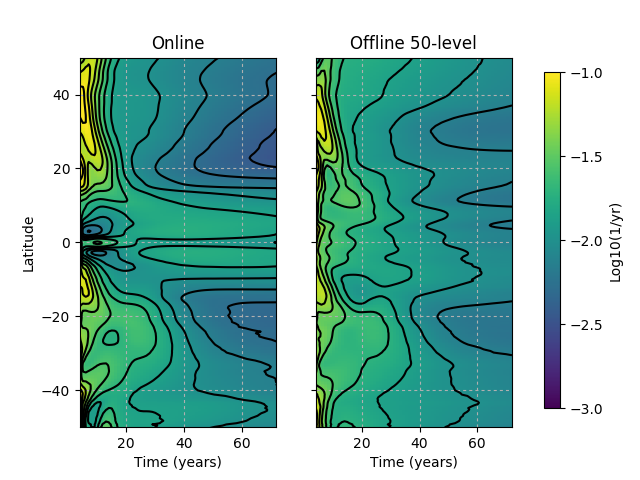

In [191]:
plotlon = -150
lonidx = np.argmin(np.abs(lon-plotlon))
fig,axes = plt.subplots(nrows=1,ncols=2)
ax = plt.subplot(1,2,1)
plot_meridional_ttd(ax,bp_online_norm[:,:,lonidx],-3,-1); plt.ylim((-50, 50))
ax.grid(ls='dotted')
ax.set_title('Online')
ax.set_ylabel('Latitude')
ax = plt.subplot(1,2,2)
ax.set_title('Offline 50-level')
mesh_ax = plot_meridional_ttd(ax,bp_vgrid_norm[:,:,lonidx],-3,-1); plt.ylim((-50, 50))
ax.grid(ls='dotted')
ax.yaxis.set_major_formatter(plt.NullFormatter())

fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.arange(-3,0,0.5))
cax.set_ylabel('Log10(1/yr)')

plt.show()
#plt.pcolormesh(trange,lat,bp_woa09_norm[:,:,lonidx].transpose()); plt.colorbar()


<IPython.core.display.Javascript object>


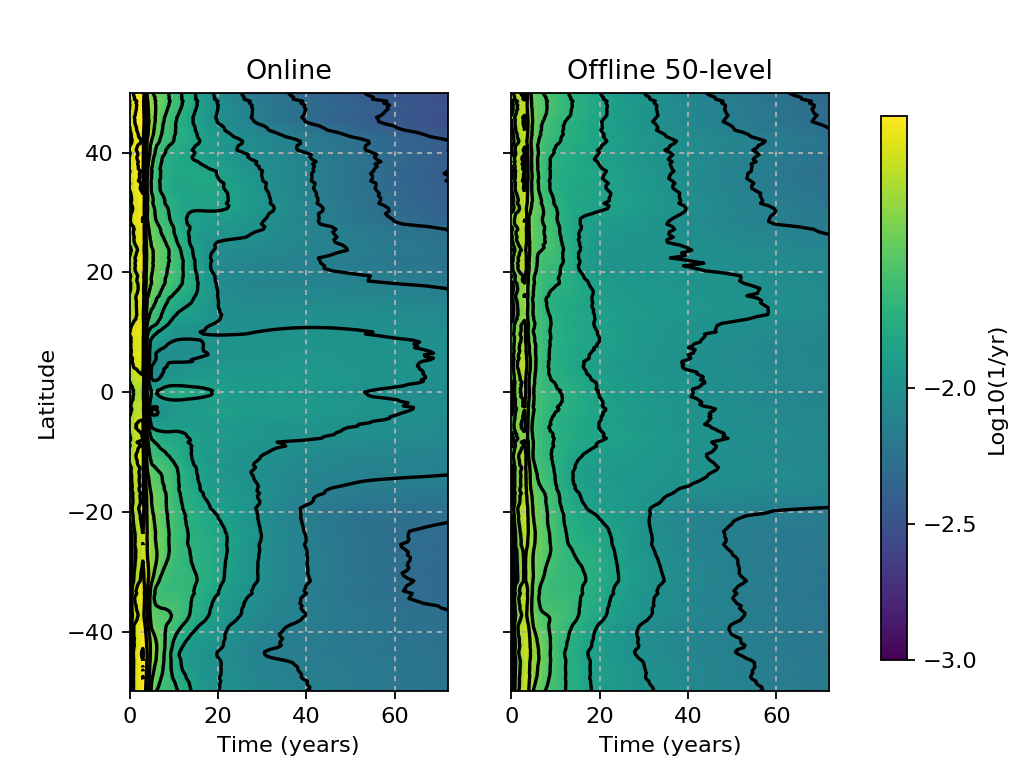

/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2)
ax = plt.subplot(1,2,1)
plot_meridional_ttd(ax,bp_online_norm.mean(axis=2),-3,-1); plt.ylim((-50, 50))
ax.grid(ls='dotted')
ax.set_title('Online')
ax.set_ylabel('Latitude')
ax = plt.subplot(1,2,2)
ax.set_title('Offline 50-level')
mesh_ax = plot_meridional_ttd(ax,bp_vgrid_norm.mean(axis=2),-3,-1); plt.ylim((-50, 50))
ax.grid(ls='dotted')
ax.yaxis.set_major_formatter(plt.NullFormatter())

fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.arange(-3,-1.5,0.5))
cax.set_ylabel('Log10(1/yr)')